In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Attempt to avoid loops in part c

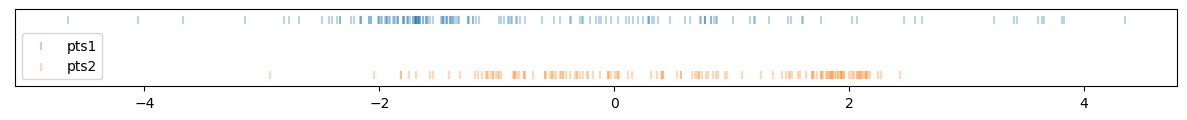

In [3]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# split the data into the classes
pts1 = pts[labels==0]
pts2 = pts[labels==1]

# plot the data
fig, ax = plt.subplots(figsize=(15, 1))
plt.scatter(pts1, np.ones_like(pts1), label='pts1', marker='|', alpha=0.3)
plt.scatter(pts2, np.zeros_like(pts2), label='pts2', marker='|', alpha=0.3)
plt.legend()
plt.yticks([])
plt.ylim(-0.2, 1.2)
plt.show()

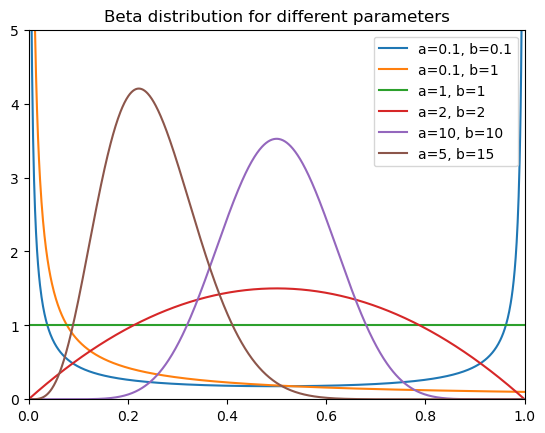

In [4]:
from scipy.special import gamma, gammaln

def beta_pdf(x, a, b):
    """Probability density function for the Beta distribution with parameters a and b. Works verctorized over all inputs"""
#     return (gamma(a+b) * x**(a-1) * (1-x)**(b-1)) / gamma(a) / gamma(b)  # breaks down for larger a, b
    return np.exp(gammaln(a+b) - gammaln(a) - gammaln(b) + np.log(x)*(a-1) + np.log(1-x)*(b-1))  # works for larger a, b

eps = 1e-6
x = np.linspace(eps, 1-eps, 1000, endpoint=True)
for a, b in ((0.1, 0.1), (0.1, 1), (1, 1), (2, 2), (10, 10), (5, 15)):
    plt.plot(x, beta_pdf(x, a, b), label=f'{a=}, {b=}')
plt.legend()
plt.ylim(0, 5)
plt.xlim(0, 1)
plt.title('Beta distribution for different parameters')
plt.show()

In [288]:
def count_points_within_distance(x, pts, r):
    """
    Count number of points among pts within a distance r of query points x (in 1D).
    
    Parameters
    ----------
    x : np.ndarray
        Query points of shape (M).
    pts : np.ndarray
        Points to be searched, shape (N).
    r : float
        radius.
        
    Returns
    -------
    np.ndarray
        Array of counts of shape (M)
        
    """
    # TODO: sort the points
    pts = np.sort(pts)
    
    # TODO: use np.searchsorted on the interval boundaries 
    #       to find number of points inside each interval (don't use loops!)
    r_up =x+r
    r_bel = x-r
    ind = np.searchsorted(r_up,r_bel) #used to create an array with boundaries eg: [-0.3,0.3,0.7,1.3...] if x is [0,1,2...] and r=0.3
    boundaries = np.insert (r_up,ind,r_bel)
    search = np.searchsorted(boundaries,pts) #finds the indices of pts points between -0.3 and 0.3, 0.3 and 0.7, etc
    search = search[np.where((search%2)!=0)] #seperates indices of points lying only between -0.3 and 0.3, 0.7 and 1.3,etc
    counts = np.unique(search,return_counts=True)[1] # returns counts
         
    return counts


### This method failed becuase in our case r is bigger than seoeration between points in x.